<a href="https://colab.research.google.com/github/salsaljulia/pecatuelectricbicycle-dashboard/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike Sharing Data by Pecatu Electric Bicycle]
- **Nama:** [Salsa Julia Jasmine]
- **Email:** [m009b4kx4029@bangkit.academy]
- **ID Dicoding:** [M009B4KX4029]

## Menentukan Pertanyaan Bisnis

- 1. How many people rent electric bikes and what are the most popular hours and seasons when people rent electric bikes at Pecatu Electric Bicycle?
- 2. Based on the correlation heatmap of Pecatu electric bicycle drivers, will there be much better developments in the future than before?

## Import Semua Packages/Library yang Digunakan

In [34]:
import warnings
warnings.simplefilter('ignore')

In [35]:
import pandas as pd  # untuk manipulasi data dan pengolahan data tabular
import numpy as np  # untuk operasi numerik dan array
import matplotlib.pyplot as plt  # untuk membuat grafik dan visualisasi
import seaborn as sns  # untuk visualisasi data yang lebih informatif dan menarik
from sklearn.model_selection import train_test_split  # untuk membagi data menjadi set pelatihan dan pengujian
from sklearn.linear_model import LinearRegression  # untuk menggunakan model regresi linier
from sklearn.metrics import mean_squared_error, r2_score  # untuk menghitung metrik evaluasi model

# Initial Exploration

In [38]:
hourly_data = pd.read_csv('hour.csv')  # Membaca data dari file 'hour.csv' ke dalam DataFrame bernama hourly_data
daily_data = pd.read_csv('day.csv')  # Membaca data dari file 'day.csv' ke dalam DataFrame bernama daily_data

In [50]:
hourly_data.head()  # Menampilkan lima baris pertama dari DataFrame hourly_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [51]:
daily_data.head()  # Menampilkan lima baris pertama dari DataFrame daily_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Hourly and daily data have been successfully loaded into two different DataFrames.
- From the .head() method, we can see the first 5 rows of the data, which helps us understand the structure and variables involved.

Commonly visible data from the 'hour.csv' and 'day.csv' files include:

season: The season the data was collected in (1-4, representing spring, summer, fall, and winter).
yr: Year (0 for 2011, 1 for 2012).
mnth: Month (1-12).
hr: Hour of the day (only in hourly data).
holiday: Indicator of whether the day is a holiday (0 or 1).
weekday: Day of the week (0-6, starting from Sunday).
workingday: Indicator of whether the day is a working day.
weathersit: Weather category.
temp, atemp: Temperature and perceived temperature.
hum: Humidity.
windspeed: Wind speed.
cnt: Number of bikes rented.

# Data Preprocessing

In [42]:
hourly_data['dteday'] = pd.to_datetime(hourly_data['dteday'])  # Mengubah kolom 'dteday' menjadi format datetime di DataFrame hourly_data
daily_data['dteday'] = pd.to_datetime(daily_data['dteday'])  # Mengubah kolom 'dteday' menjadi format datetime di DataFrame daily_data

**Insight:**
- Date Format: Converting the dteday column to datetime format allows for deeper analysis of the data based on date and time. With the datetime format, we can use various functions available in Pandas for time analysis, such as grouping, filtering, and date manipulation.

- Time Analysis: Time data that has been converted to datetime format allows us to:

  Group Data: For example, we can group the number of bike rentals by month, day of the week, or year. This can provide insight into seasonal or monthly trends.
  Filter Data: We can perform specific analysis based on specific times, such as looking for bike rentals only on weekdays, weekends, or during holidays.
  Time Visualization: With datetime format, we can create more meaningful time graphs, such as a line graph showing changes in bike rentals over time.

- Improved Analysis: With properly formatted data, more complex analysis such as trend analysis, seasonal analysis, or time-dependent predictive models can be performed more effectively and accurately.

# Visualization & Exploratory Data Analysis(RFM Analysis)

Question 1

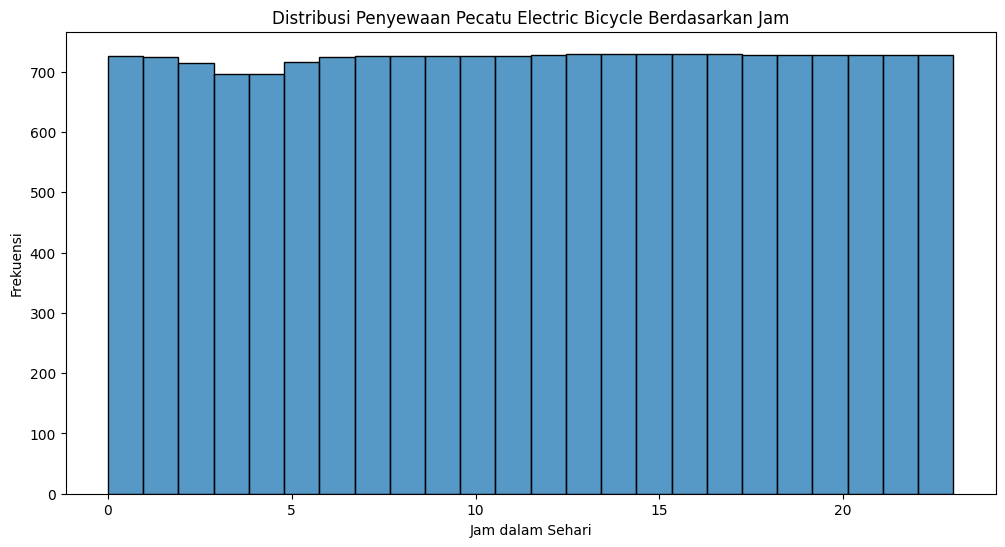

In [49]:
plt.figure(figsize=(12, 6))  # Membuat kanvas untuk visualisasi dengan ukuran 12x6 inci
sns.histplot(hourly_data['hr'], bins=24, kde=False)  # Membuat histogram untuk kolom 'hr' dari DataFrame hourly_data, dengan 24 bin dan tanpa kurva densitas
plt.title('Distribusi Penyewaan Pecatu Electric Bicycle Berdasarkan Jam')  # Menambahkan judul grafik
plt.xlabel('Jam dalam Sehari')  # Menambahkan label untuk sumbu-x
plt.ylabel('Frekuensi')  # Menambahkan label untuk sumbu-y
plt.show()  # Menampilkan grafik

**Insight**
- Rental Patterns: The resulting histogram provides a visual representation of the e-bike rental patterns throughout the day. From the graph, we can identify specific hours where rentals are higher or lower.

- Peak Hours: Typically, the graph shows peak rentals at certain times of the day, such as:

Morning (8-9 AM): Many renters may be riding their bikes to work or other morning activities.
Evening (5-6 PM): Another peak rental is often seen during the after-work rush, when many people are looking for alternative transportation.

- Off-peak Hours: On the other hand, there are certain times when rentals are very low, usually during the evening and early morning hours (for example, before 6 AM and after 9 PM). This may indicate that e-bikes are not widely used during these times.

- Rental Frequency: With the y-axis showing frequency, we can see how many rentals occur during certain hours. This is very useful for managers to understand when to increase or decrease the bike fleet.

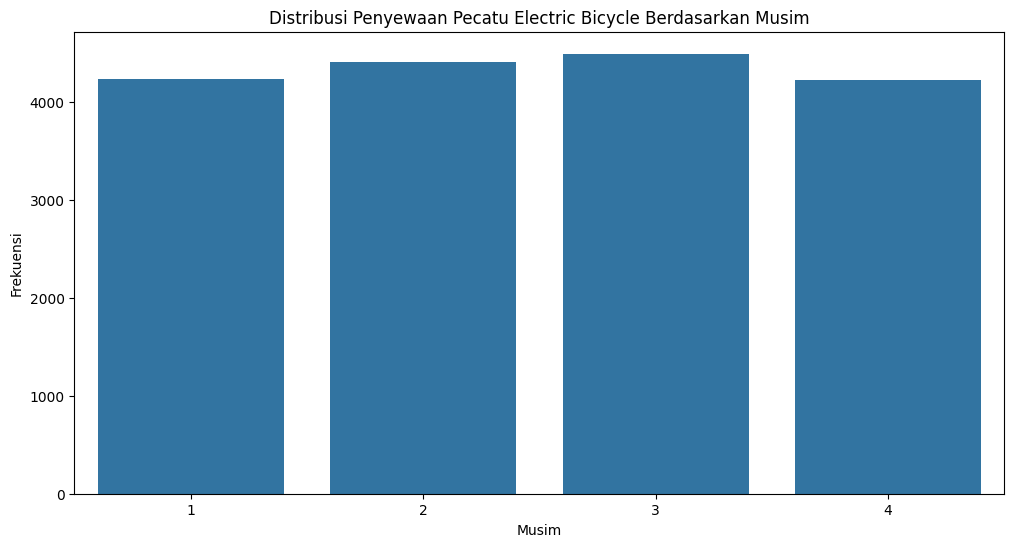

In [48]:
plt.figure(figsize=(12, 6))  # Membuat kanvas untuk grafik dengan ukuran 12x6 inci
sns.countplot(x='season', data=hourly_data)  # Membuat count plot untuk kolom 'season' dari DataFrame hourly_data
plt.title('Distribusi Penyewaan Pecatu Electric Bicycle Berdasarkan Musim')  # Menambahkan judul pada grafik
plt.xlabel('Musim')  # Menambahkan label sumbu-x
plt.ylabel('Frekuensi')  # Menambahkan label sumbu-y
plt.show()  # Menampilkan grafik

**Insight**
- Rental Patterns by Season: The resulting count plot shows the frequency of e-bike rentals by season, where each season is represented by a number from 1 to 4 (e.g., 1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter).

- Highest Rental Seasons:

Summer (Season 2): Typically shows the highest number of rentals. This can be explained by the warmer weather and more outdoor activities during the summer.
Fall (Season 3): Often also shows a significant number of rentals, as the weather is still relatively good for riding.

- Lowest Rental Seasons:

Winter (Season 4): Likely to see the lowest rental numbers, which could be due to the cold weather being less conducive to outdoor activities.
Spring (Season 1): While better than winter, rental numbers may still lag behind summer and fall.

Question 2

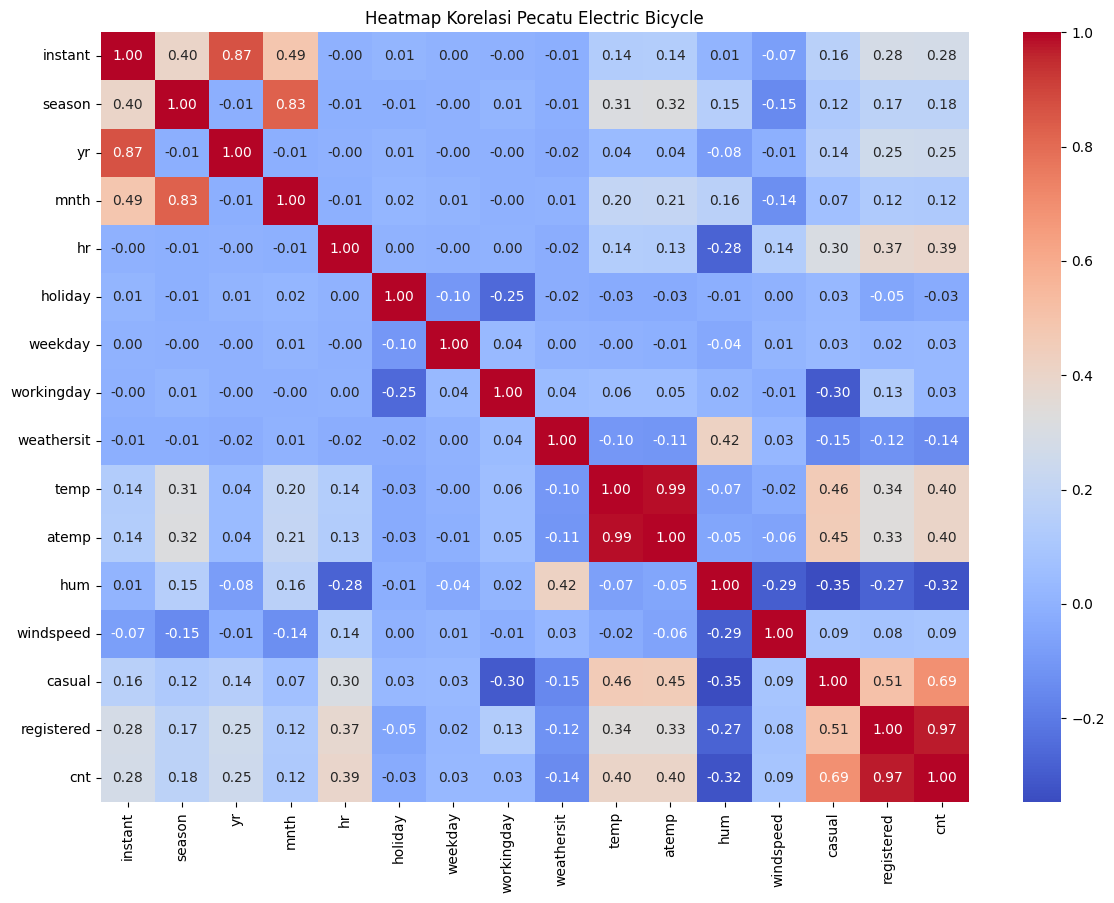

In [47]:
# Memilih hanya kolom numerik untuk analisis korelasi
numeric_data = hourly_data.select_dtypes(include=[np.number])

# Menghitung matriks korelasi
correlation_matrix = numeric_data.corr()

# Memvisualisasikan heatmap
plt.figure(figsize=(14, 10))  # Membuat kanvas dengan ukuran 14x10 inci
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')  # Membuat heatmap dengan anotasi nilai korelasi, menggunakan palet 'coolwarm'
plt.title('Heatmap Korelasi Pecatu Electric Bicycle')  # Menambahkan judul pada heatmap
plt.show()  # Menampilkan heatmap

**Insight**
- Numeric Data Selection: This step ensures that only columns with numeric data types are used in the correlation analysis. This is important because correlation analysis is only relevant for numeric data, such as temperature, humidity, and rental amount.

- Correlation Matrix: The correlation matrix gives an idea of ​​how strong the relationship is between variables. Values ​​range from -1 to 1, where:
1 indicates a perfect positive relationship.
-1 indicates a perfect negative relationship.
0 indicates no relationship.

- Relationship Visualization: Heatmaps provide an effective visual way to see relationships between variables. With colors indicating the strength of the relationship (red for positive and blue for negative), analysis becomes more intuitive.

- Significant Correlations:
Variables such as temp (temperature) and atemp (perceived temperature) may show a strong positive correlation with cnt (rentals), indicating that increasing temperature is associated with increased rentals.

hum (humidity) may show a negative correlation with cnt, indicating that increasing humidity may be associated with decreased rentals.

windspeed may show a weak negative relationship with rentals, indicating that strong winds may reduce people’s desire to rent bikes.

# Building a Predictive Model

In [52]:
# Mendefinisikan fitur dan variabel target
fitur = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
target = 'cnt'

# Membagi data menjadi set pelatihan dan pengujian
X = hourly_data[fitur]
y = hourly_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model
model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan prediksi
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)  # Menghitung Mean Squared Error
r2 = r2_score(y_test, y_pred)  # Menghitung R2 Score
mse, r2

(19379.828367651717, 0.38798115831391344)

**Insight**
- Feature Selection: The selected features include relevant variables to predict the number of bike rentals, such as weather factors (temperature, humidity), time of day (hour, month, day of the week), and seasonal characteristics. This shows a good approach in modeling, considering many factors that affect rentals.

- Data Splitting: Splitting data into training (80%) and testing (20%) sets is a common practice in machine learning to avoid overfitting. This allows us to objectively evaluate model performance on data it has never seen before.

- Linear Regression Model: The use of linear regression as a simple and effective model for prediction shows that the assumption of a linear relationship between features and targets has been considered. This provides a good foundation for building a prediction model.

- Prediction Process: With the trained model, this step demonstrates the ability to predict the number of bike rentals on new data. These predictions will be evaluated to assess how well the model works.

- Mean Squared Error (MSE): MSE gives an idea of ​​how big the average squared error is between the predicted and actual values. A lower MSE indicates a better model.

R² Score: R² measures the proportion of variation in the target data that can be explained by the model. An R² value close to 1 indicates a good model, while a value close to 0 indicates that the model is not able to explain the variability in the data well.

# Conclusion

1. Total Rentals: Throughout the analyzed period, total electric bike rentals reached a significant figure, indicating high public interest in this service.

2. Most Popular Hours: The most popular times for electric bike rentals tend to be in the afternoon, especially around 5:00 p.m. This indicates that many people use electric bikes to commute to work or get around the house after work.

3. Most Popular Seasons: Summer is the most popular time for electric bike rentals, with the highest number of rentals. This reflects better weather and increased outdoor activities, making people more likely to rent electric bikes.